In [5]:
# Importação das Bibliotecas
import pandas as pd  # Para manipulação e análise de dados
import numpy as np  # Para operações matemáticas e manipulação de arrays
import matplotlib.pyplot as plt  # Para visualização de dados
import seaborn as sns  # Para visualização estatística e gráficos sofisticados
from datetime import datetime  # Para manipulação de datas e horas
import glob  # Para localizar arquivos que correspondem a um padrão específico
import os  # Para manipulação de arquivos e diretórios
from sklearn.model_selection import train_test_split  # Para divisão de dados em conjuntos de treinamento e teste
import missingno as msno  # Para visualização de dados ausentes 

In [6]:
#Carregar e Combinar Dados

import pandas as pd
import os

# Obtendo a lista de todos os arquivos CSV no diretório atual
file_names = [
    "coin_XRP.csv",
    "coin_Aave.csv",
    "coin_BinanceCoin.csv",
    "coin_Bitcoin.csv",
    "coin_Cardano.csv",
    "coin_ChainLink.csv",
    "coin_Cosmos.csv",
    "coin_CryptocomCoin.csv",
    "coin_Dogecoin.csv",
    "coin_EOS.csv",
    "coin_Ethereum.csv",
    "coin_Iota.csv",
    "coin_Litecoin.csv",
    "coin_Monero.csv",
    "coin_NEM.csv",
    "coin_Polkadot.csv",
    "coin_Solana.csv",
    "coin_Stellar.csv",
    "coin_Tether.csv",
    "coin_Tron.csv",
    "coin_Uniswap.csv",
    "coin_USDCoin.csv",
    "coin_WrappedBitcoin.csv"
]

# Carregue e combine todos os arquivos CSV em um único DataFrame
dfs = [pd.read_csv(file_name) for file_name in file_names]
data = pd.concat(dfs, ignore_index=True)

# Verifique as primeiras linhas e informações dos dados
print(data.head())
print(data.info())


   SNo Name Symbol                 Date      High       Low      Open  \
0    1  XRP    XRP  2013-08-05 23:59:59  0.005980  0.005613  0.005875   
1    2  XRP    XRP  2013-08-06 23:59:59  0.005661  0.004629  0.005637   
2    3  XRP    XRP  2013-08-07 23:59:59  0.004682  0.004333  0.004669   
3    4  XRP    XRP  2013-08-08 23:59:59  0.004424  0.004175  0.004397   
4    5  XRP    XRP  2013-08-09 23:59:59  0.004367  0.004253  0.004257   

      Close  Volume     Marketcap  
0  0.005613     0.0  4.387916e+07  
1  0.004680     0.0  3.659101e+07  
2  0.004417     0.0  3.453412e+07  
3  0.004254     0.0  3.325863e+07  
4  0.004291     0.0  3.354750e+07  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37082 entries, 0 to 37081
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        37082 non-null  int64  
 1   Name       37082 non-null  object 
 2   Symbol     37082 non-null  object 
 3   Date       37082 non-null  obje

Valores nulos em cada coluna:
SNo          0
Name         0
Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Marketcap    0
dtype: int64

Estatísticas descritivas:
                SNo                           Date          High  \
count  37082.000000                          37082  37082.000000   
mean    1056.699018  2018-08-16 07:12:30.221616896   1016.058015   
min        1.000000            2013-04-29 23:59:59      0.000089   
25%      420.000000            2017-03-05 23:59:59      0.075664   
50%      910.000000            2019-01-09 23:59:59      1.008733   
75%     1585.000000            2020-05-13 23:59:59     31.916399   
max     2991.000000            2021-07-06 23:59:59  64863.098908   
std      755.992373                            NaN   5249.503670   

                Low          Open         Close        Volume     Marketcap  
count  37082.000000  37082.000000  37082.000000  3.708200e+04  3.708200e+04  
mean     95

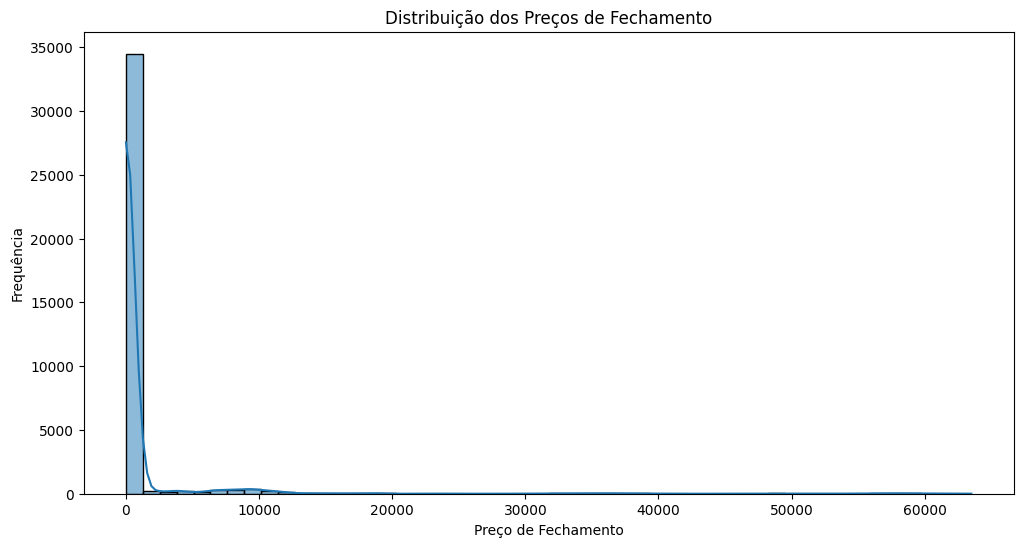


Primeiras linhas do DataFrame:
   SNo Name Symbol                Date      High       Low      Open  \
0    1  XRP    XRP 2013-08-05 23:59:59  0.005980  0.005613  0.005875   
1    2  XRP    XRP 2013-08-06 23:59:59  0.005661  0.004629  0.005637   
2    3  XRP    XRP 2013-08-07 23:59:59  0.004682  0.004333  0.004669   
3    4  XRP    XRP 2013-08-08 23:59:59  0.004424  0.004175  0.004397   
4    5  XRP    XRP 2013-08-09 23:59:59  0.004367  0.004253  0.004257   

      Close  Volume     Marketcap  
0  0.005613     0.0  4.387916e+07  
1  0.004680     0.0  3.659101e+07  
2  0.004417     0.0  3.453412e+07  
3  0.004254     0.0  3.325863e+07  
4  0.004291     0.0  3.354750e+07  


In [7]:
# Converter a coluna 'Date' para o tipo datetime
data['Date'] = pd.to_datetime(data['Date'])

# Verificar a presença de valores nulos
print("Valores nulos em cada coluna:")
print(data.isnull().sum())

# Visualizar algumas estatísticas descritivas dos dados
print("\nEstatísticas descritivas:")
print(data.describe())

# Verificar o tipo de dados das colunas
print("\nTipos de dados das colunas:")
print(data.dtypes)

# Visualizar a distribuição dos preços de fechamento
plt.figure(figsize=(12, 6))
sns.histplot(data['Close'], bins=50, kde=True)
plt.title('Distribuição dos Preços de Fechamento')
plt.xlabel('Preço de Fechamento')
plt.ylabel('Frequência')
plt.show()

# Verificar as primeiras linhas do DataFrame após a conversão de datas
print("\nPrimeiras linhas do DataFrame:")
print(data.head())

In [8]:
# Célula 4: Normalização dos Dados

from sklearn.preprocessing import StandardScaler

# Selecionar colunas numéricas para normalização
numeric_columns = ['High', 'Low', 'Open', 'Close', 'Volume', 'Marketcap']

# Criar uma instância do StandardScaler
scaler = StandardScaler()

# Normalizar os dados
data[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Verificar as primeiras linhas após a normalização
print("\nPrimeiras linhas após normalização:")
print(data.head())



Primeiras linhas após normalização:
   SNo Name Symbol                Date      High       Low      Open  \
0    1  XRP    XRP 2013-08-05 23:59:59 -0.193555 -0.194174 -0.193654   
1    2  XRP    XRP 2013-08-06 23:59:59 -0.193555 -0.194175 -0.193654   
2    3  XRP    XRP 2013-08-07 23:59:59 -0.193555 -0.194175 -0.193654   
3    4  XRP    XRP 2013-08-08 23:59:59 -0.193555 -0.194175 -0.193654   
4    5  XRP    XRP 2013-08-09 23:59:59 -0.193555 -0.194175 -0.193654   

      Close    Volume  Marketcap  
0 -0.193794 -0.253793  -0.217955  
1 -0.193794 -0.253793  -0.218059  
2 -0.193794 -0.253793  -0.218088  
3 -0.193794 -0.253793  -0.218106  
4 -0.193794 -0.253793  -0.218102  


In [9]:
# Célula 5: Adição de Indicadores Técnicos

# Adicionar a média móvel de 7 dias
data['SMA_7'] = data['Close'].rolling(window=7).mean()

# Adicionar o índice de força relativa (RSI)
def calculate_rsi(data, window=14):
    delta = data['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

data['RSI'] = calculate_rsi(data)

# Verificar as primeiras linhas com os novos indicadores
print("\nPrimeiras linhas com indicadores técnicos:")
print(data[['Date', 'Close', 'SMA_7', 'RSI']].head())



Primeiras linhas com indicadores técnicos:
                 Date     Close  SMA_7  RSI
0 2013-08-05 23:59:59 -0.193794    NaN  NaN
1 2013-08-06 23:59:59 -0.193794    NaN  NaN
2 2013-08-07 23:59:59 -0.193794    NaN  NaN
3 2013-08-08 23:59:59 -0.193794    NaN  NaN
4 2013-08-09 23:59:59 -0.193794    NaN  NaN


In [11]:
# Preencher valores NaN com o valor anterior (forward fill)
data.ffill(inplace=True)

# Verificar as primeiras linhas após preenchimento
print("\nPrimeiras linhas após preenchimento de valores faltantes:")
print(data[['Date', 'Close', 'SMA_7', 'RSI']].head())



Primeiras linhas após preenchimento de valores faltantes:
                 Date     Close     SMA_7        RSI
0 2013-08-05 23:59:59 -0.193794 -0.193794  50.043125
1 2013-08-06 23:59:59 -0.193794 -0.193794  50.043125
2 2013-08-07 23:59:59 -0.193794 -0.193794  50.043125
3 2013-08-08 23:59:59 -0.193794 -0.193794  50.043125
4 2013-08-09 23:59:59 -0.193794 -0.193794  50.043125


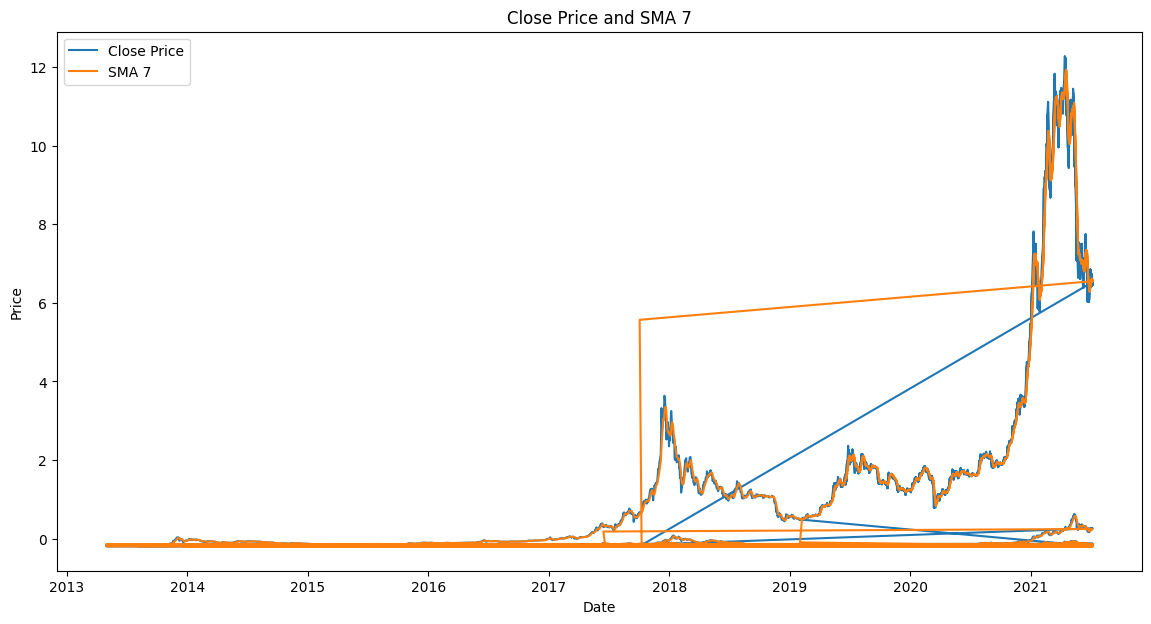

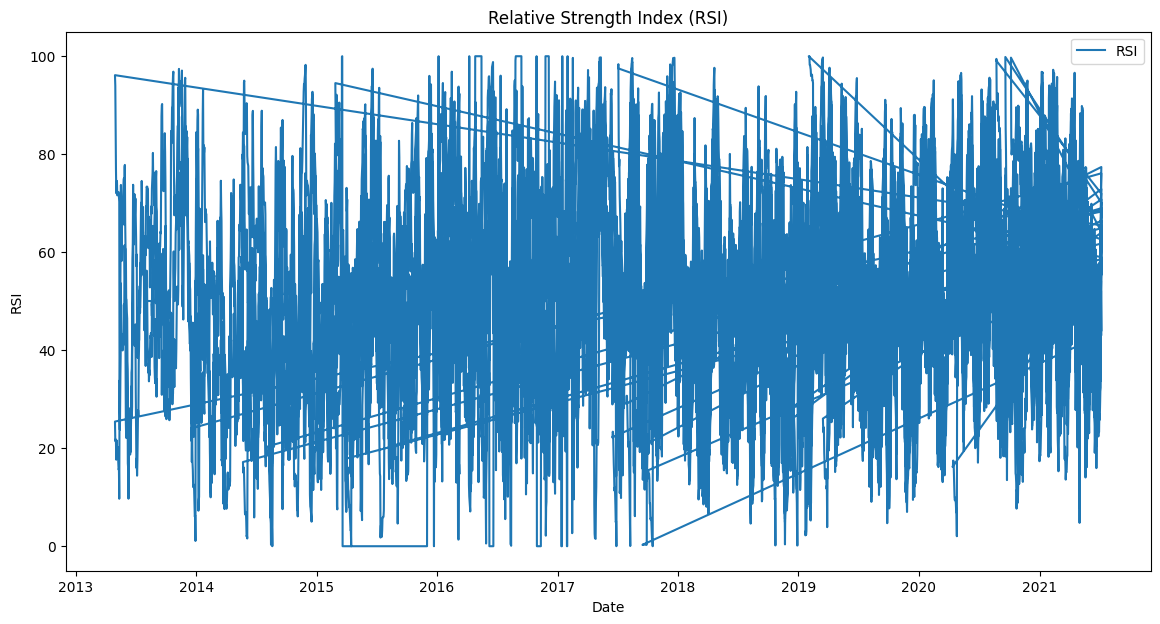

In [12]:
# Plotando a série temporal de 'Close'
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['Close'], label='Close Price')
plt.plot(data['Date'], data['SMA_7'], label='SMA 7')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Close Price and SMA 7')
plt.legend()
plt.show()

# Plotando o RSI
plt.figure(figsize=(14, 7))
plt.plot(data['Date'], data['RSI'], label='RSI')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.title('Relative Strength Index (RSI)')
plt.legend()
plt.show()


In [13]:
# Separar variáveis independentes (X) e dependentes (y)
X = data[['SMA_7', 'RSI']]
y = data['Close']

# Dividir os dados em conjunto de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Inicializar e treinar o modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Fazer previsões
y_pred = model.predict(X_test)

# Avaliar o modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 0.008829472735097077
R^2 Score: 0.9962205858811614
